In [2]:
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import scipy.stats as stats
import pandas as pd
import scipy.optimize
sns.set()

In [3]:
n=1000
t=np.arange(0, n, 1)
a=0.1
b=0.5
c=5
d=0.1
e=1
sigma=1
theta=0.5

In [4]:
def m(t):
    return a * t + b

def s(t):
    return c * np.sin(d * t + e)

In [5]:
Z_t = np.random.normal(0, sigma, n)

Y_t = np.zeros(n)
Y_t[0] = Z_t[0]
for i in range(1, n):
    Y_t[i] = theta * Z_t[i - 1] + Z_t[i]

X_t = m(t) + s(t) + Y_t

Text(0.5, 1.0, '$X_t$')

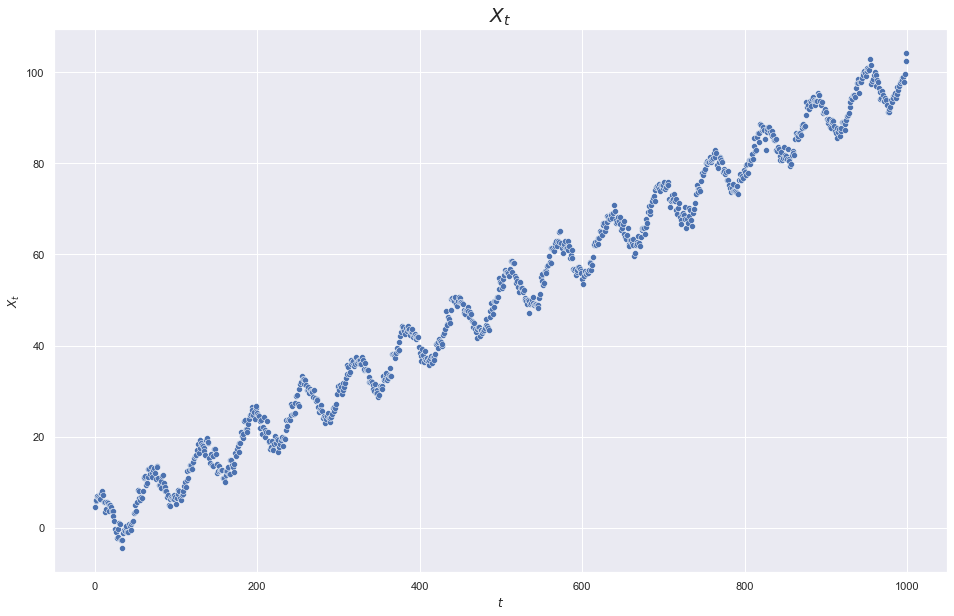

In [6]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=t, y=X_t)
plt.xlabel("$t$")
plt.ylabel("$X_t$")
plt.title("$X_t$", fontsize=20)

In [7]:
def least_square(t, X_t):
    n = len(t)
    X_bar = np.mean(X_t)
    t_bar = np.mean(t)
    X_t_bar = np.mean(X_t * t)
    t_2_bar = np.mean(t ** 2)
    a = (X_t_bar - X_bar * t_bar) / (t_2_bar - t_bar ** 2)
    b = X_bar - a * t_bar
    return a, b

In [8]:
a, b = least_square(t, X_t)
print(f"a = {a}, b = {b}")

a = 0.09951074411470276, b = 0.6933294028641086


In [9]:
def m_hat(t):
    return a * t + b

m_hats = m_hat(t)

Text(0.5, 1.0, '$X_t$')

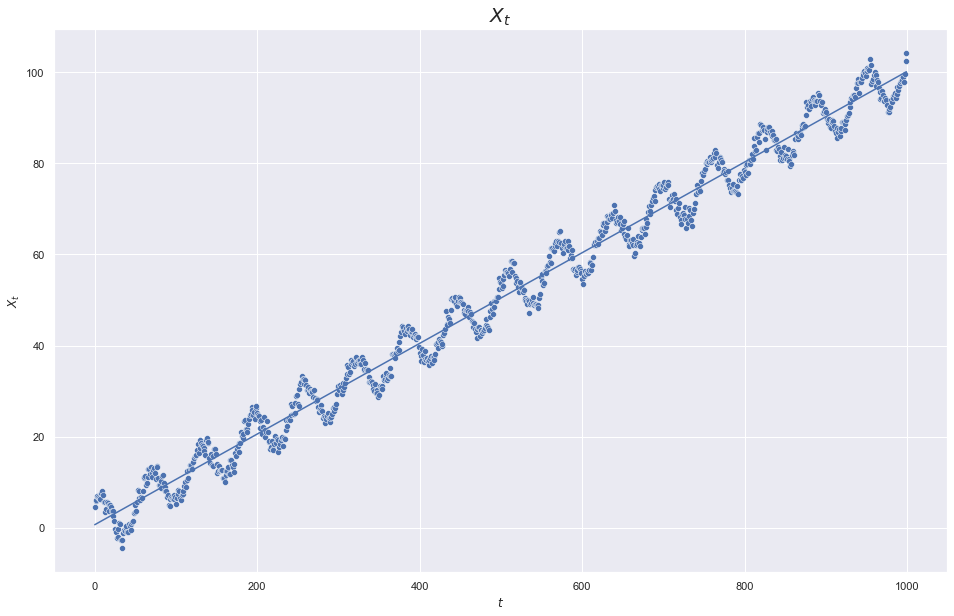

In [10]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=t, y=X_t)
sns.lineplot(x=t, y=m_hats)
plt.xlabel("$t$")
plt.ylabel("$X_t$")
plt.title("$X_t$", fontsize=20)
### TREND

In [11]:
def autocov(h, xs):
    n = len(xs)
    mean = np.mean(xs)
    h = np.abs(h)
    res = 0
    for i in range(n-h):
        res += (xs[i] - mean)*(xs[i+h] - mean)
    return res/n

In [12]:
def autocorr(h, xs):
    return autocov(h, xs)/autocov(0, xs)

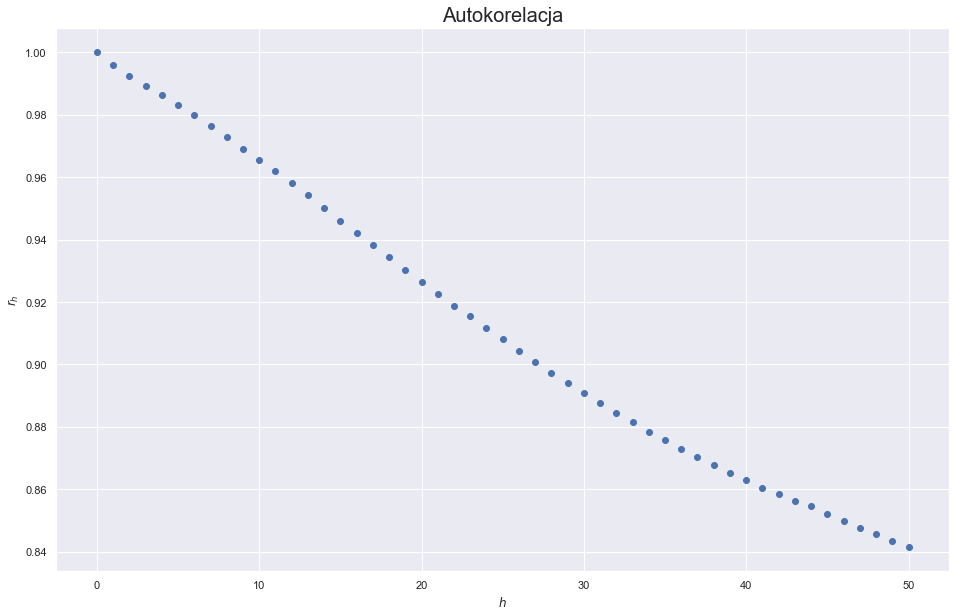

In [13]:
hs = np.arange(0, 51, 1)
autocorrs = [autocorr(h, X_t) for h in hs]
plt.figure(figsize=(16, 10))
plt.scatter(hs, autocorrs)
plt.title("Autokorelacja", fontsize=20)
plt.xlabel("$h$")
plt.ylabel("$r_h$")
plt.show()

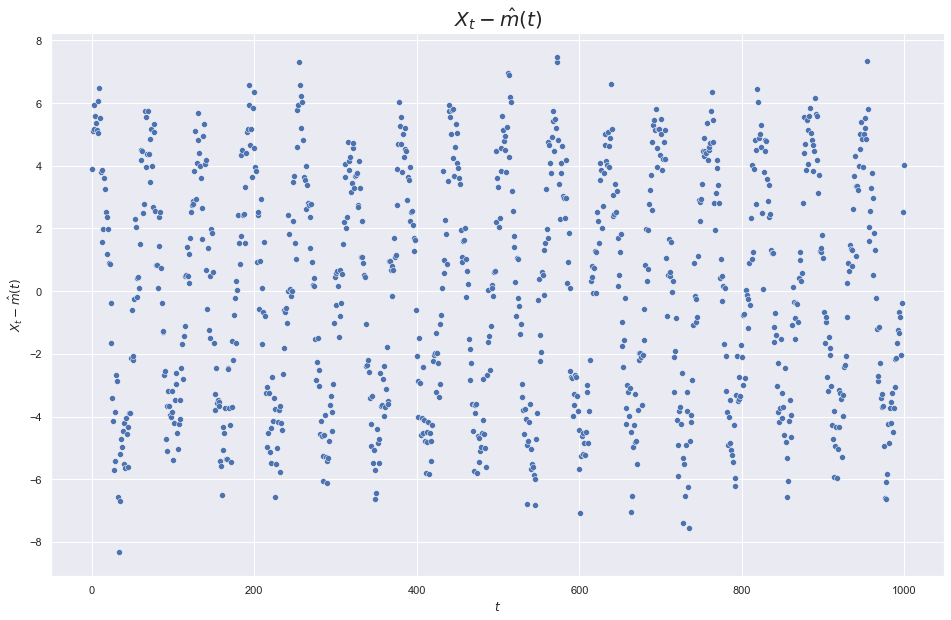

In [14]:
X_minus_m = X_t - m_hats


plt.figure(figsize=(16, 10))

##wykres usuniecia trendu
sns.scatterplot(x=t, y=X_minus_m)
plt.xlabel("$t$")
plt.ylabel("$X_t - \hat{m}(t)$")
plt.title("$X_t - \hat{m}(t)$", fontsize=20);


Text(0, 0.5, '$r_h$')

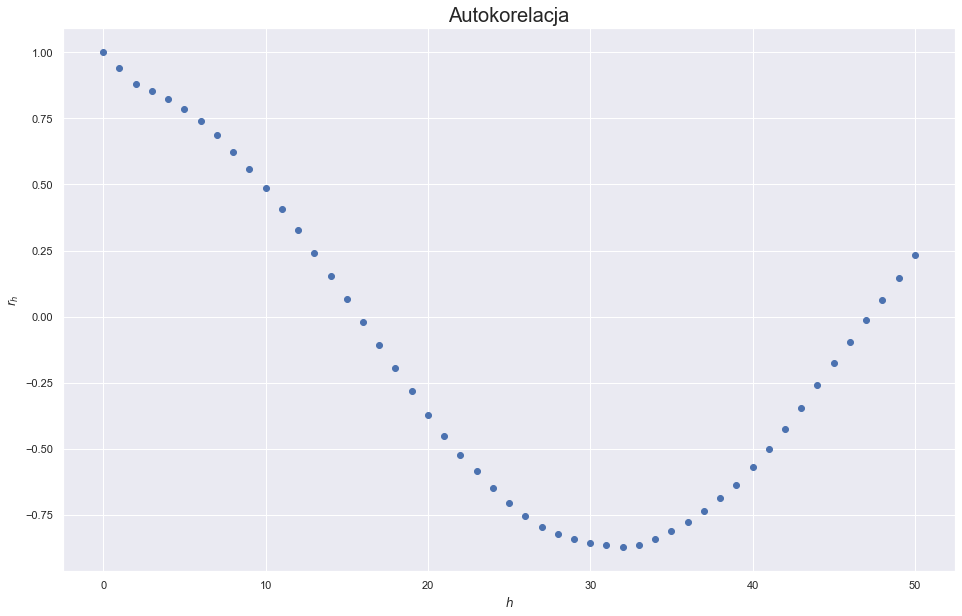

In [15]:
hs = np.arange(0, 51, 1)
autocorrs = [autocorr(h, X_minus_m) for h in hs]

plt.figure(figsize=(16, 10))
plt.scatter(hs, autocorrs)
plt.title("Autokorelacja", fontsize=20)
plt.xlabel("$h$")
plt.ylabel("$r_h$")

In [16]:
def seasonality(t, c, d, e):
    return c * np.sin(d * t + e)

params, _ = scipy.optimize.curve_fit(seasonality, t, X_minus_m, p0=[5, 0.1, 1])

c_hat, d_hat, e_hat = params

seasonality_hat = seasonality(t, c_hat, d_hat, e_hat)

Text(0.5, 1.0, 'X_t - m(t)')

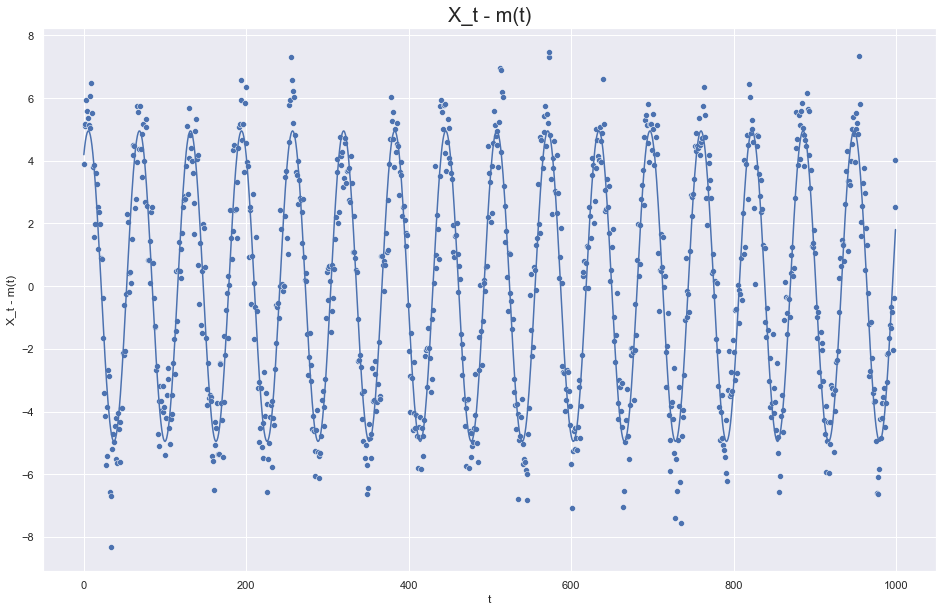

In [23]:
plt.figure(figsize=(16, 10))

sns.scatterplot(x=t, y=X_minus_m)
sns.lineplot(x=t, y=seasonality_hat)
plt.xlabel("t")
plt.ylabel("X_t - m(t)")
plt.title("X_t - m(t)", fontsize=20)

Text(0.5, 1.0, 'X_t - m(t) - s(t)')

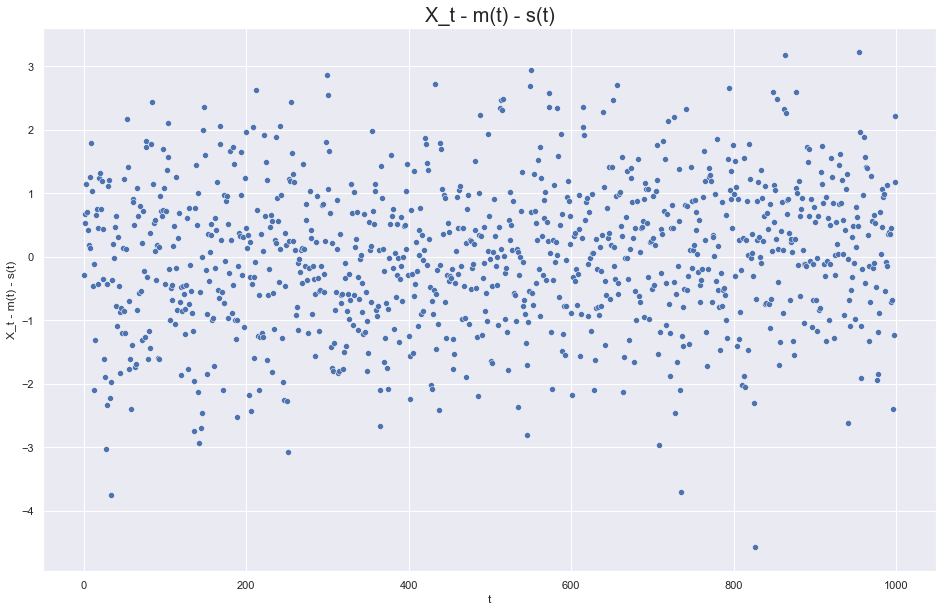

In [21]:
X_minus_m_minus_s = X_minus_m - seasonality_hat

plt.figure(figsize=(16, 10))

sns.scatterplot(x=t, y=X_minus_m_minus_s)
plt.xlabel("t")
plt.ylabel("X_t - m(t) - s(t)")
plt.title("X_t - m(t) - s(t)", fontsize=20)

In [19]:
def autocorr_theoretical(h, sigma, theta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return theta/(1 + theta**2)
    else:
        return 0
    
def autocov_theoretical(h, sigma, theta):
    if h == 0:
        return sigma**2*(1 + theta**2)
    elif h == 1 or h == -1:
        return sigma**2*theta
    else:
        return 0

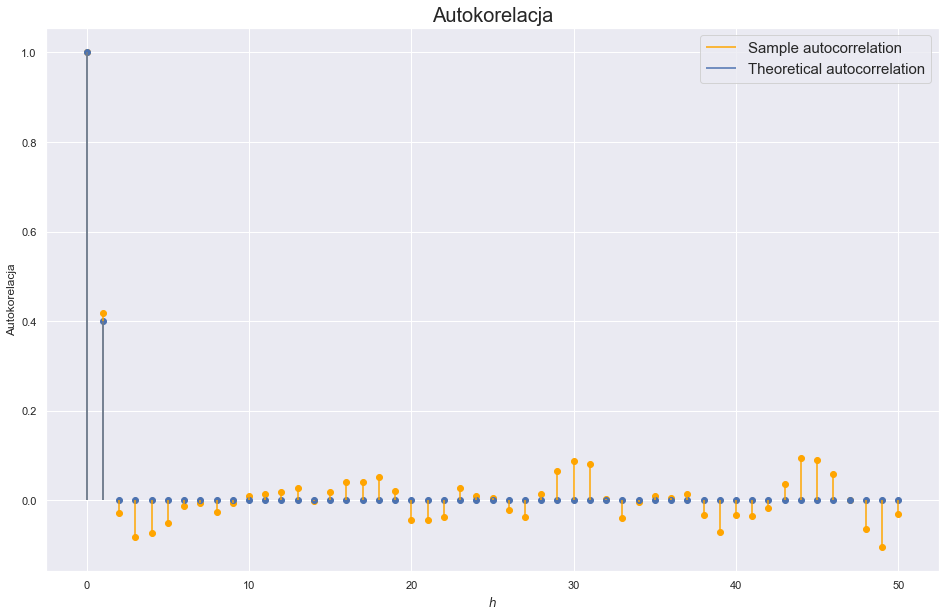

In [20]:
# autocorr

hs = np.arange(0, 51, 1)
autocorrs = [autocorr(h, X_minus_m_minus_s) for h in hs]
autocorrs_theoretical = [autocorr_theoretical(h, sigma, theta) for h in hs]

plt.figure(figsize=(16, 10))
plt.vlines(hs, 0, autocorrs, label="Sample autocorrelation", color="orange")
plt.scatter(hs, autocorrs, color="orange")
plt.vlines(hs, 0, autocorrs_theoretical, label="Theoretical autocorrelation")
plt.scatter(hs, autocorrs_theoretical)

plt.xlabel("$h$")
plt.ylabel("Autokorelacja")
plt.title("Autokorelacja", fontsize=20)
plt.legend(fontsize=15)